### Umbrella Sampling PMF Graph - Time

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

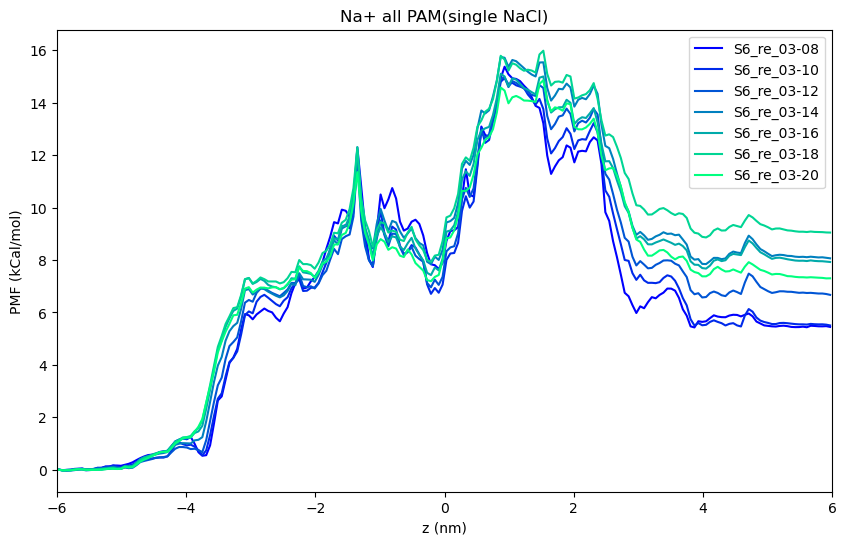

In [10]:
# 设置文件夹路径模式
base_folder_pattern = 'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_moy/subhamoy_swiss_itp/nacl_single/na-direction/S6_re_03-*'
sub_folder_name = 'umbrellaS_re'
file_name = 'profile.xvg'

# 创建颜色映射
cmap = plt.cm.winter  # 选择一个颜色映射，例如冬天的色系

# 创建图形
plt.figure(figsize=(10, 6))

# 匹配所有主文件夹路径
base_folders = glob.glob(base_folder_pattern)
# 用于归一化颜色的数字列表
folder_numbers = []

# 先遍历一遍以收集数字
for base_folder in base_folders:
    # 从文件夹名中提取数字
    number_part = os.path.basename(base_folder).split('-')[-1]
    try:
        folder_numbers.append(int(number_part))
    except ValueError:
        print(f"Could not extract a number from folder name: {base_folder}")
        continue  # 跳过不含数字的文件夹名

# 计算归一化因子
min_num = min(folder_numbers)
max_num = max(folder_numbers)
norm_factor = max_num - min_num if max_num != min_num else 1  # 防止除以零

# 再次遍历以绘图
for base_folder in base_folders:
    sub_folder_path = os.path.join(base_folder, sub_folder_name)
    file_path = os.path.join(sub_folder_path, file_name)

    if os.path.isfile(file_path):
        data_array = np.loadtxt(file_path, comments=('#', '@'))
        x_data = data_array[:, 0]
        y_data = data_array[:, 1]
        label = os.path.basename(base_folder)

        # 计算颜色深度
        number_part = int(label.split('-')[-1])
        color_value = (number_part - min_num) / norm_factor  # 归一化数字
        color = cmap(color_value)  # 从颜色映射中获取颜色

        plt.plot(x_data, y_data, label=label, color=color)

# 控制X轴的位置
plt.xlim([-6, 6])  # 例如设置X轴显示从0到10

plt.xlabel("z (nm)")
plt.ylabel("PMF (kCal/mol)")
# Add a title to the plot.
plt.title("Na+ all PAM(single NaCl)")

plt.legend()
plt.show()